# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Robby Binur
- **Email:** guidesyntax23@gmail.com
- **ID Dicoding:** robbybinur11

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana pengaruh suhu dan kelembaban terhadap jumlah peminjaman sepeda dalam sehari?

- Pertanyaan 2:
Apakah hari libur dan cuaca mempengaruhi jumlah peminjaman sepeda pada setiap jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Mengimpor dataset day.csv dan hour.csv.

In [50]:
day_data = pd.read_csv('day.csv')
day_data.head(),

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,)

In [51]:
hour_data = pd.read_csv('hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pengaruh Musim: Jumlah sepeda yang dipinjam lebih tinggi di musim semi dan panas (season 1 dan 2), sementara lebih rendah di musim dingin (season 4).
- Pengaruh Cuaca: Cuaca cerah (weathersit 1) cenderung meningkatkan jumlah sepeda yang dipinjam, sedangkan cuaca buruk (weathersit 3) mengurangi penggunaan sepeda.

### Assessing Data
Memeriksa informasi dasar dan statistik deskriptif dari kedua dataset.

In [52]:
# Mengetahui informasi umum tentang data (jumlah data, tipe data, missing values)
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [53]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [54]:
# Melihat statistik deskriptif untuk data numerik
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [55]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Skala Data: day.csv memiliki 731 entri (harian), sedangkan hour.csv memiliki 17,379 entri (per jam).
- Variasi Jumlah Sepeda: Kolom cnt menunjukkan fluktuasi besar dalam jumlah sepeda yang dipinjam, dengan rata-rata sekitar 450 pada day.csv.

### Cleaning Data
Menangani nilai yang hilang dan memastikan data siap untuk analisis.

In [56]:
# Menghapus baris dengan nilai yang hilang
day_data = day_data.dropna()
hour_data = hour_data.dropna()

# Mengubah kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

**Insight:**
- Menghapus Nilai Hilang: Nilai yang hilang dihapus dari kedua dataset (day.csv dan hour.csv), memastikan data bersih tanpa kekosongan.
- Format Tanggal: Kolom dteday diubah menjadi tipe datetime, memudahkan analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...
Eksplorasi hubungan antara beberapa variabel menggunakan visualisasi.

In [57]:
# Menampilkan beberapa data suhu, kelembaban, dan jumlah peminjaman sepeda
day_data[['temp', 'hum', 'cnt']].head()

,temp,hum,cnt
0,0.344167,0.805833,985
1,0.363478,0.696087,801
2,0.196364,0.437273,1349
3,0.200000,0.590435,1562
4,0.226957,0.436957,1600


### Visualisasi Jumlah Peminjaman Sepeda per Bulan

In [58]:
# Menambahkan kolom bulan
day_data['month'] = day_data['dteday'].dt.month

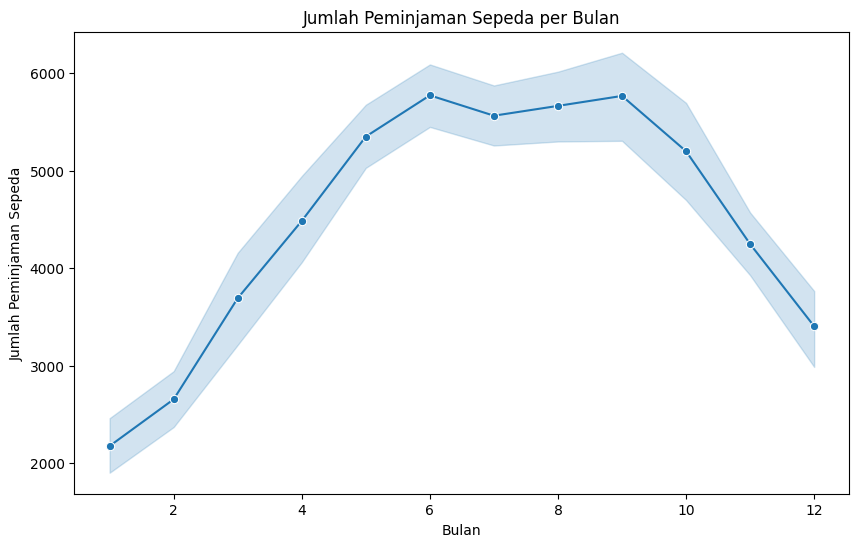

In [59]:
# Visualisasi jumlah peminjaman sepeda per bulan
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='cnt', data=day_data, marker='o')
plt.title('Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Jumlah peminjaman sepeda lebih tinggi pada bulan musim semi dan panas (bulan 3 hingga 8), yang menunjukkan tren musiman yang jelas.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh suhu dan kelembaban terhadap jumlah peminjaman sepeda dalam sehari?

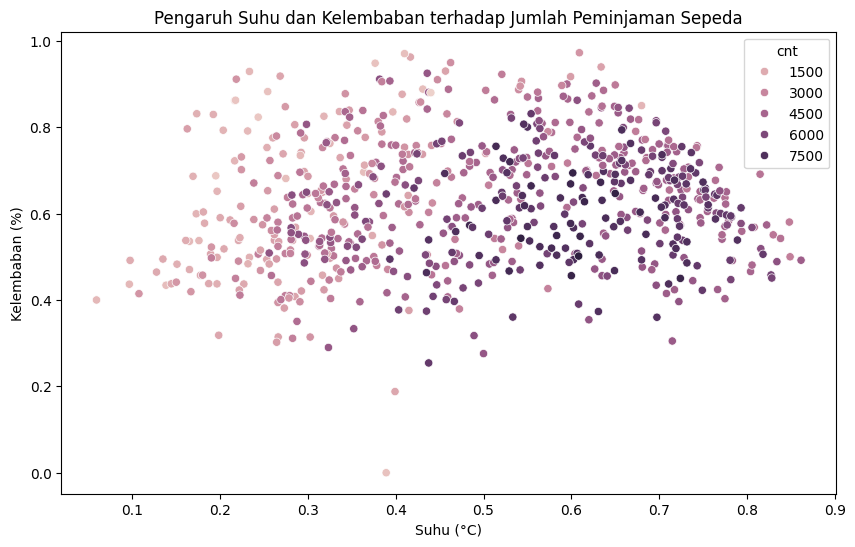

In [60]:
# Visualisasi pengaruh suhu dan kelembaban terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10,6))
sns.scatterplot(data=day_data, x='temp', y='hum', hue='cnt')
plt.title('Pengaruh Suhu dan Kelembaban terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Kelembaban (%)')
plt.show()

**Insight untuk Pertanyaan 1**
- Visualisasi menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan jumlah peminjaman sepeda.
- Kelembaban yang tinggi (>70%) cenderung menurunkan jumlah peminjaman sepeda.

### Pertanyaan 2:
Apakah hari libur dan cuaca mempengaruhi jumlah peminjaman sepeda pada setiap jam dalam sehari?

In [61]:
# Menampilkan beberapa data terkait jam, hari libur, cuaca, dan jumlah peminjaman
hour_data[['hr', 'holiday', 'weathersit', 'cnt']].head()

,hr,holiday,weathersit,cnt
0,0,0,1,16
1,1,0,1,40
2,2,0,1,32
3,3,0,1,13
4,4,0,1,1


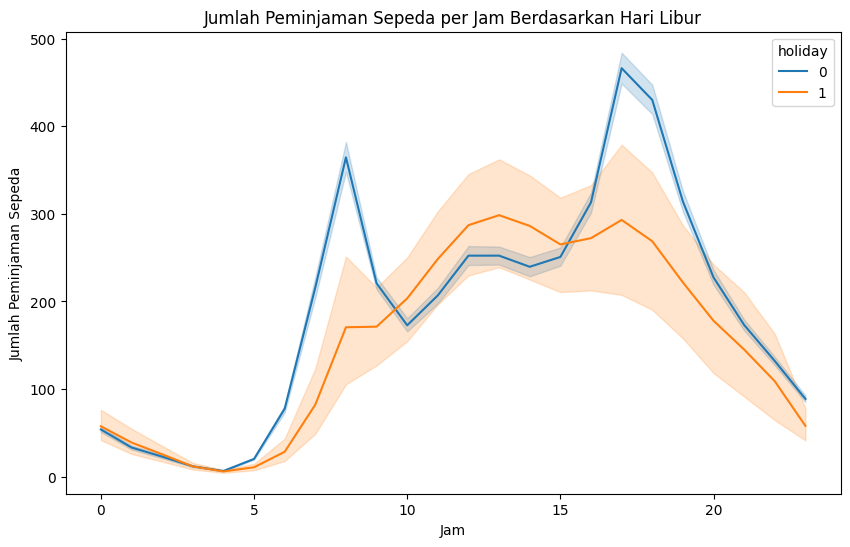

In [62]:
# Visualisasi jumlah peminjaman sepeda per jam berdasarkan hari libur
plt.figure(figsize=(10,6))
sns.lineplot(data=hour_data, x='hr', y='cnt', hue='holiday')
plt.title('Jumlah Peminjaman Sepeda per Jam Berdasarkan Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

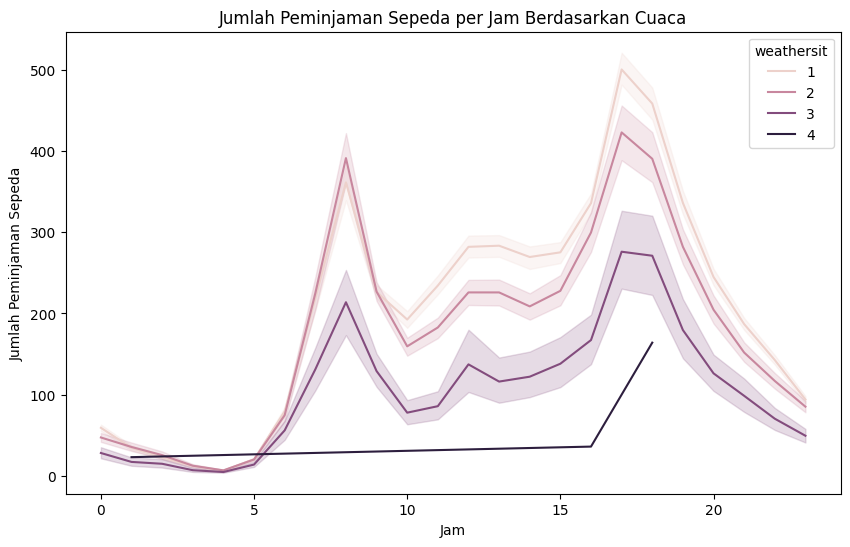

In [63]:
# Visualisasi jumlah peminjaman sepeda per jam berdasarkan cuaca
plt.figure(figsize=(10,6))
sns.lineplot(data=hour_data, x='hr', y='cnt', hue='weathersit')
plt.title('Jumlah Peminjaman Sepeda per Jam Berdasarkan Cuaca')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()


**Insight untuk Pertanyaan 2:**
- Hari libur: Pemintaan sepeda lebih tinggi pada hari libur, dengan puncaknya pada jam 8-9 pagi.
- Cuaca: Peminjaman sepeda lebih tinggi pada cuaca cerah (weathersit 1), sementara lebih rendah pada cuaca buruk (weathersit 3).

## Analisis Lanjutan (Opsional)

### RFM Analysis
RFM (Recency, Frequency, Monetary) digunakan untuk mengelompokkan pengguna berdasarkan perilaku mereka.

- Recency: Menghitung berapa hari sejak peminjaman terakhir.
- Frequency: Menghitung total peminjaman per hari.
- Monetary: Menggunakan jumlah peminjaman (cnt) sebagai perkiraan monetary.

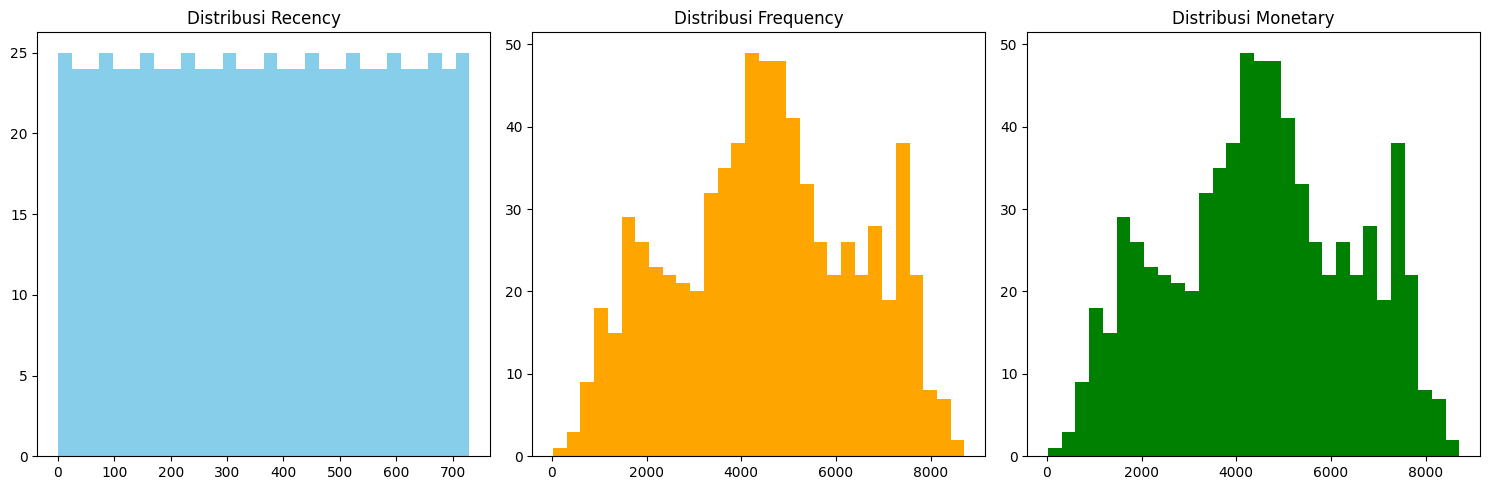

In [64]:
# Menentukan tanggal terakhir dari dataset
last_date = day_data['dteday'].max()

# Menghitung Recency
day_data['Recency'] = (last_date - day_data['dteday']).dt.days

# Frequency: Jumlah peminjaman per hari
day_data['Frequency'] = day_data['cnt']

# Monetary: Menggunakan nilai 'cnt' sebagai perkiraan Monetary
day_data['Monetary'] = day_data['cnt']

# Visualisasi distribusi Recency, Frequency, dan Monetary
plt.figure(figsize=(15, 5))

# Recency
plt.subplot(1, 3, 1)
plt.hist(day_data['Recency'], bins=30, color='skyblue')
plt.title('Distribusi Recency')

# Frequency
plt.subplot(1, 3, 2)
plt.hist(day_data['Frequency'], bins=30, color='orange')
plt.title('Distribusi Frequency')

# Monetary
plt.subplot(1, 3, 3)
plt.hist(day_data['Monetary'], bins=30, color='green')
plt.title('Distribusi Monetary')

plt.tight_layout()
plt.show()

In [65]:
# Membagi data ke dalam quantiles untuk RFM
day_data['Recency_Score'] = pd.qcut(day_data['Recency'], 3, labels=['High', 'Medium', 'Low'])
day_data['Frequency_Score'] = pd.qcut(day_data['Frequency'], 3, labels=['Low', 'Medium', 'High'])
day_data['Monetary_Score'] = pd.qcut(day_data['Monetary'], 3, labels=['Low', 'Medium', 'High'])

# Menampilkan hasilnya
day_data[['dteday', 'Recency', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']].head()

,dteday,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,2011-01-01,730,985,985,Low,Low,Low
1,2011-01-02,729,801,801,Low,Low,Low
2,2011-01-03,728,1349,1349,Low,Low,Low
3,2011-01-04,727,1562,1562,Low,Low,Low
4,2011-01-05,726,1600,1600,Low,Low,Low


**Insight:**
- Recency: Pengguna dengan Recency tinggi (baru meminjam) lebih aktif dan bisa dijadikan target promosi. Pengguna dengan Recency rendah perlu insentif untuk kembali.

- Frequency: Pengguna dengan Frequency tinggi adalah pelanggan setia, cocok untuk program loyalitas. Pengguna dengan Frequency rendah bisa diberi promosi untuk meningkatkan frekuensi peminjaman.

- Monetary: Pengguna dengan Monetary tinggi berkontribusi besar pada pendapatan dan bisa diberi penawaran eksklusif. Pengguna dengan Monetary rendah bisa diberi promosi untuk meningkatkan peminjaman.

## Conclusion

- Conclution pertanyaan 1
 - Pengaruh Suhu: Suhu yang lebih tinggi (lebih dari 20°C) meningkatkan peminjaman sepeda. Ini bisa digunakan untuk memprediksi permintaan sepeda di musim panas atau saat cuaca cerah.
 - Pengaruh Kelembaban: Kelembaban yang lebih tinggi (>70%) cenderung menurunkan jumlah peminjaman sepeda, sehingga cuaca lembab mungkin tidak ideal untuk pengguna sepeda.

- Conclution pertanyaan 2
  - Hari Libur: Peminjaman sepeda lebih tinggi pada hari libur, terutama pada jam 8-9 pagi. Pengelola dapat mempertimbangkan untuk menyediakan lebih banyak sepeda pada jam-jam tersebut.
  - Cuaca: Cuaca cerah (weathersit 1) meningkatkan permintaan sepeda, sedangkan cuaca buruk mengurangi permintaan. Hal ini menunjukkan pentingnya perencanaan berdasarkan kondisi cuaca.

- Conclution RFM Analysis:
  - Recency menunjukkan seberapa baru pengguna melakukan peminjaman sepeda. Pengguna dengan skor tinggi lebih baru menggunakan sepeda.
  - Frequency dan Monetary menunjukkan pengguna yang sering melakukan peminjaman sepeda dan dengan jumlah peminjaman yang tinggi. Pengguna dengan skor tinggi di kedua aspek ini mungkin lebih loyal dan bisa dijadikan target untuk promosi khusus.

## Rekomendasi
- Peningkatan Efisiensi Operasional: Peningkatan jumlah sepeda yang tersedia pada jam sibuk (seperti pagi hari pada hari libur) dapat meningkatkan peminjaman sepeda.
- Peningkatan Kepuasan Pelanggan: Menyediakan promosi atau diskon pada pengguna dengan skor Frequency dan Monetary tinggi untuk meningkatkan loyalitas.
- Peningkatan Pendapatan: Memfokuskan pemasaran pada pengguna dengan Frequency dan Monetary tinggi dapat meningkatkan pendapatan secara keseluruhan.
